# Project 3: Webscraping, NLP and classification modelling

# Contents:

1) Most frequently mentioned words in each sub  
2) Feature engineering and cleaning  
3) Word clouds  
4) Word and character counts  
5) Exploring possible predictors of upvotes  

# Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
from spacy import displacy
sp = spacy.load('en_core_web_sm')




In [38]:
sub1_df =pd.read_csv('../datasets/sub1_df_27_nov.csv')
sub2_df =pd.read_csv('../datasets/sub2_df_27_nov.csv')
master_df = pd.read_csv('../datasets/combined_26_nov_df.csv')

# Frequency of top words in the subreddits

In [39]:
def get_top_n_words(corpus, n=None):
    stops = stopwords.words('english')
    stops.append('gt')
    cvec = CountVectorizer(stop_words = stops).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
common_titles_1 = get_top_n_words(sub1_df['title'], 20)
for word, freq in common_titles_1:
    print(word, freq)

call 84
customer 53
get 34
center 33
free 29
talk 28
want 24
people 24
one 22
friday 21
phone 21
time 21
us 20
company 20
like 19
work 19
know 19
today 18
customers 17
first 17


In [41]:
common_posts_1 = get_top_n_words(sub1_df['post'], 20)
for word, freq in common_posts_1:
    print(word, freq)

call 2003
get 1284
customer 1183
one 963
like 886
would 810
know 790
time 726
phone 706
company 696
work 637
back 637
people 632
us 623
calls 622
account 612
want 577
need 577
well 570
help 569


In [42]:
common_titles_2 = get_top_n_words(sub2_df['title'], 20)
for word, freq in common_titles_2:
    print(word, freq)

user 30
need 29
work 29
support 29
tech 27
fix 24
printer 23
know 22
customer 22
computer 21
time 21
want 19
tale 17
never 17
phone 17
right 16
new 16
old 16
email 16
working 15


In [43]:
common_posts_2 = get_top_n_words(sub2_df['post'], 20)
for word, freq in common_posts_2:
    print(word, freq)

one 1812
get 1604
call 1206
back 1200
work 1158
time 1079
user 1048
like 988
know 965
would 956
need 840
new 833
phone 813
got 809
see 801
customer 771
could 761
working 760
go 740
company 740


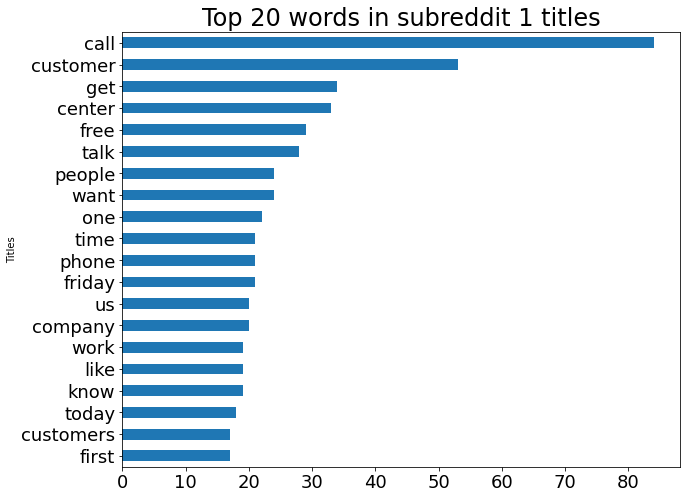

In [44]:
df_titles = pd.DataFrame(common_titles_1, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
df_titles.groupby('Titles').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit 1 titles", fontsize=24);

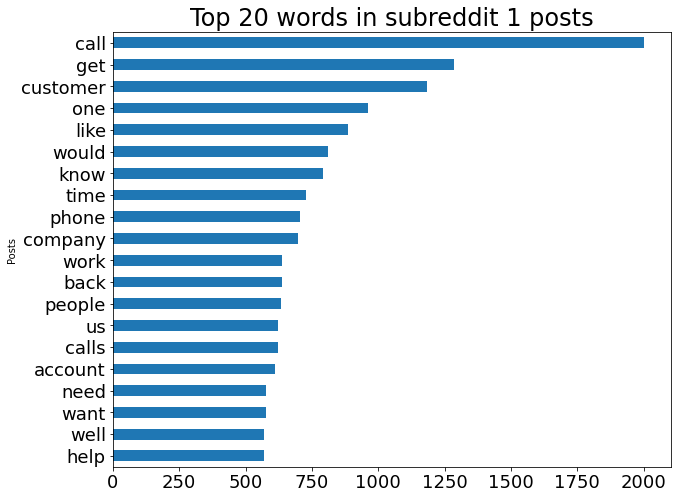

In [45]:
df_posts = pd.DataFrame(common_posts_1, columns=['Posts', 'count'])
plt.figure(figsize=(10,8))
df_posts.groupby('Posts').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit 1 posts", fontsize=24);

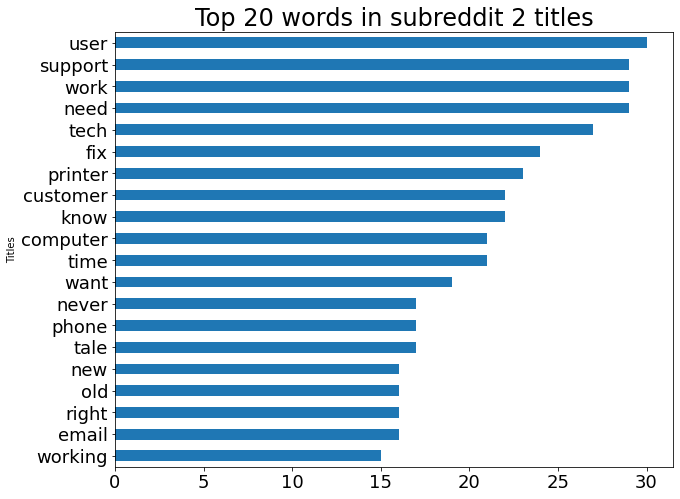

In [46]:
df_titles = pd.DataFrame(common_titles_2, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
df_titles.groupby('Titles').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit 2 titles", fontsize=24);

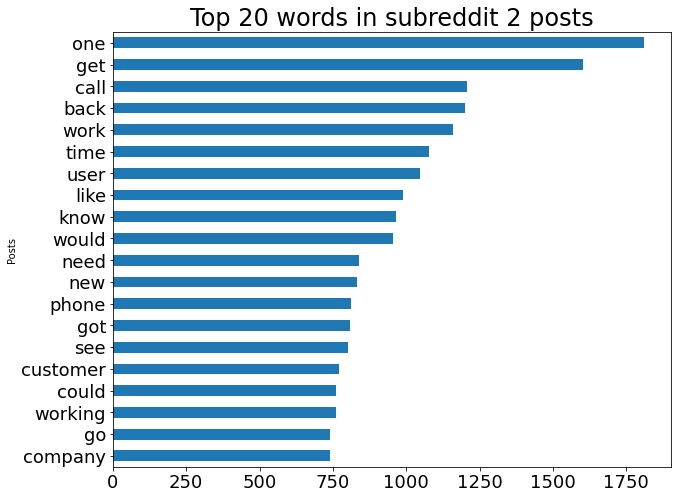

In [47]:
df_posts = pd.DataFrame(common_posts_2, columns=['Posts', 'count'])
plt.figure(figsize=(10,8))
df_posts.groupby('Posts').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit 2 posts", fontsize=24);

# Feature Engineering - Tokenizer and Cleaning

In [48]:

tokenizer = RegexpTokenizer(r'[a-z]+')

In [49]:
master_df.head()

,title,post,upvotes,gilded,belongs_to_sub2,title_x_post
0,Just need to vent...,"I get that tempers are shorter these days, but...",230,0,0,Just need to vent... I get that tempers are sh...
1,Reverse call center post,On mobile so I hope I do this right. \n\nI ha...,39,0,0,Reverse call center post On mobile so I hope I...
2,"""So you're willing to lose a customer for $3 d...",I work for a car rental company as a specialis...,763,0,0,"""So you're willing to lose a customer for $3 d..."
3,Free Talk Friday - Nov 27,Welcome to Free Talk Friday! We are suspending...,0,0,0,Free Talk Friday - Nov 27 Welcome to Free Talk...
4,Accidentally Exposed a Family Fraud,I work for a small local ISP. One of the thin...,958,0,0,Accidentally Exposed a Family Fraud I work for...


In [50]:
master_df['token'] = master_df['title_x_post'].map(lambda x: tokenizer.tokenize(x.lower()))

In [51]:
master_df.head()

,title,post,upvotes,gilded,belongs_to_sub2,title_x_post,token
0,Just need to vent...,"I get that tempers are shorter these days, but...",230,0,0,Just need to vent... I get that tempers are sh...,"[just, need, to, vent, i, get, that, tempers, ..."
1,Reverse call center post,On mobile so I hope I do this right. \n\nI ha...,39,0,0,Reverse call center post On mobile so I hope I...,"[reverse, call, center, post, on, mobile, so, ..."
2,"""So you're willing to lose a customer for $3 d...",I work for a car rental company as a specialis...,763,0,0,"""So you're willing to lose a customer for $3 d...","[so, you, re, willing, to, lose, a, customer, ..."
3,Free Talk Friday - Nov 27,Welcome to Free Talk Friday! We are suspending...,0,0,0,Free Talk Friday - Nov 27 Welcome to Free Talk...,"[free, talk, friday, nov, welcome, to, free, t..."
4,Accidentally Exposed a Family Fraud,I work for a small local ISP. One of the thin...,958,0,0,Accidentally Exposed a Family Fraud I work for...,"[accidentally, exposed, a, family, fraud, i, w..."


In [52]:
stop_words = set(stopwords.words('english'))

In [53]:
for i in range(len(master_df['token'])):
    master_df.at[i,'token'] = [word for word in master_df['token'][i] if word not in stop_words]

In [54]:
master_df['joined_text']= master_df['title_x_post'].map(lambda x: ''.join(x))

In [55]:
master_df.groupby('belongs_to_sub2')['joined_text'].get_group(0)

0      Just need to vent... I get that tempers are sh...
1      Reverse call center post On mobile so I hope I...
2      "So you're willing to lose a customer for $3 d...
3      Free Talk Friday - Nov 27 Welcome to Free Talk...
4      Accidentally Exposed a Family Fraud I work for...
                             ...                        
837    "They're recording my voice to open credit car...
838    This is my last week in a call center I guess ...
839    "I don't check my credit card statements" Like...
840    “My family has all your products”! I work for ...
841    One of the Worst Calls I've Ever Experienced I...
Name: joined_text, Length: 842, dtype: object

In [56]:
text_sub_1 = " ".join(x for x in master_df.groupby('belongs_to_sub2')['joined_text'].get_group(0))
                          
print ("There are {} words in sub 1 title + posts.".format(len(text_sub_1)))

There are 1618464 words in sub 1 title + posts.


In [57]:
text_sub_2 = " ".join(x for x in master_df.groupby('belongs_to_sub2')['joined_text'].get_group(1))
                          
print ("There are {} words in sub 2 title + posts.".format(len(text_sub_2)))

There are 2464071 words in sub 2 title + posts.


# Visualizing the 2 subreddits with wordclouds

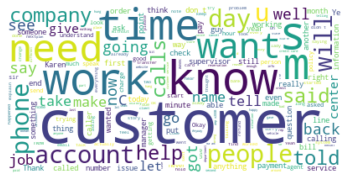

In [58]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["call", "one"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_sub_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

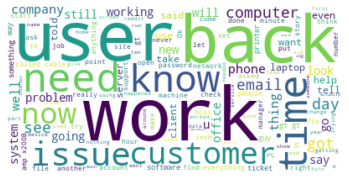

In [59]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["call", "one"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_sub_2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploring word counts

In [60]:
master_df['word_count'] = master_df['token'].map(lambda x: len(x))
master_df['char_count'] = master_df['title_x_post'].map(lambda x: len(x))

In [61]:
word_count_mean = master_df.groupby('belongs_to_sub2')[['word_count']].mean()
word_count_mean

,word_count
belongs_to_sub2,
0,164.790974
1,242.107658


In [62]:
master_df['subreddit'] = master_df['belongs_to_sub2'].replace((0, 1), ('call_center', 'tech_support'))

In [63]:
word_count_mean = master_df.groupby('subreddit')[['word_count']].mean()
word_count_mean

,word_count
subreddit,
call_center,164.790974
tech_support,242.107658


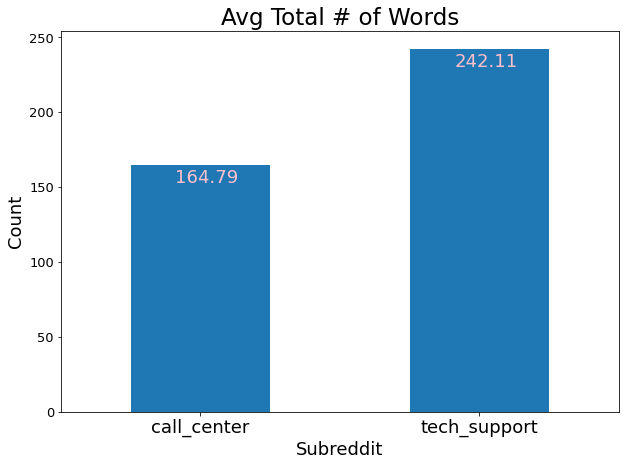

In [64]:
ax = word_count_mean['word_count'].plot(kind='bar', figsize=(10,7),
                                                   fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Avg Total # of Words', fontsize = 23)
ax.set_ylabel('Count', fontsize = 18);
ax.set_xlabel('Subreddit', fontsize = 18)
ax.set_xticklabels(word_count_mean.index, rotation=0, fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.16, i.get_height()-12, \
            "{:,}".format(round((i.get_height()), 2)), fontsize=18,
                color='pink')


In [65]:
sub1_df['token_titles'] = sub1_df['title'].apply(tokenizer.tokenize)

In [66]:
sub2_df['token_titles'] = sub2_df['title'].apply(tokenizer.tokenize)

In [67]:
sub1_df['token_posts'] = sub1_df['post'].apply(tokenizer.tokenize)

In [68]:
sub2_df['token_posts'] = sub2_df['post'].apply(tokenizer.tokenize)

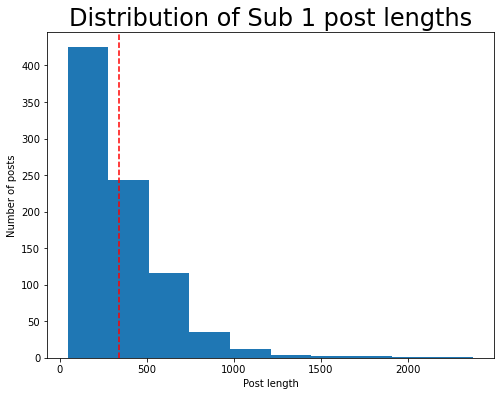

In [69]:
post_length_sub1 = [len(title) for title in sub1_df['token_posts']]
fig = plt.figure(figsize=(8, 6)) 
plt.xlabel('Post length')
plt.ylabel('Number of posts')
plt.hist(post_length_sub1)

mean_words = sum(post_length_sub1)/sub1_df.shape[0]
plt.axvline(mean_words, color='r', linestyle='--')
plt.title('Distribution of Sub 1 post lengths', fontsize=24)
plt.show();

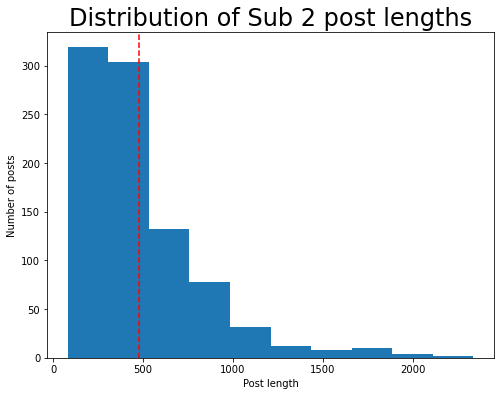

In [70]:
post_length_sub2 = [len(title) for title in sub2_df['token_posts']]
fig = plt.figure(figsize=(8, 6)) 
plt.xlabel('Post length')
plt.ylabel('Number of posts')
plt.hist(post_length_sub2)

mean_words = sum(post_length_sub2)/sub2_df.shape[0]
plt.axvline(mean_words, color='r', linestyle='--')
plt.title('Distribution of Sub 2 post lengths', fontsize=24)
plt.show();

# Are there any features that can predict upvotes?

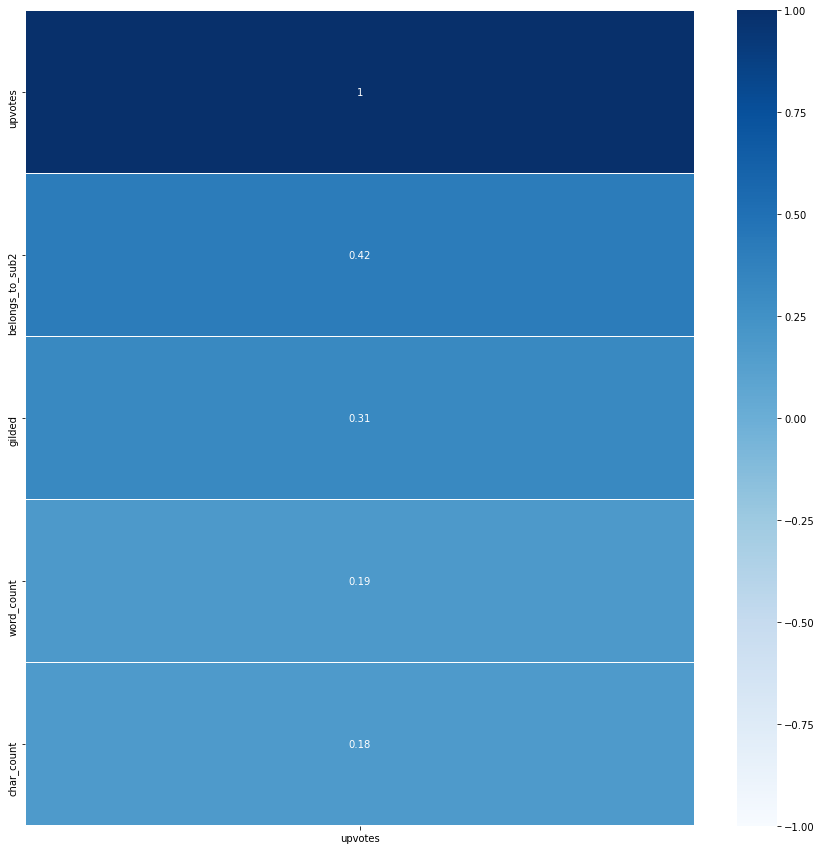

In [36]:
#correlation heatmap with just the upvotes column 
plt.figure(figsize = (15,15))
sns.heatmap(master_df.corr()[['upvotes']].sort_values(by=['upvotes'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [37]:
master_df['upvotes'].describe()
    

count    1743.000000
mean      526.168101
std       719.773702
min         0.000000
25%        63.000000
50%       234.000000
75%       694.000000
max      7741.000000
Name: upvotes, dtype: float64

In [19]:
master_df.sort_values(by = 'upvotes', ascending = False)

,title,post,upvotes,gilded,belongs_to_sub2,title_x_post,token
1731,DELETE MY ACCOUNT *NOW*!,"This story took place about 6 years ago, and i...",7741,3,1,DELETE MY ACCOUNT *NOW*! This story took place...,"[delete, my, account, now, this, story, took, ..."
868,"A tale about respect, manners, and how IT fire...","A recent ""Karen"" story I read reminded me that...",5450,3,1,"A tale about respect, manners, and how IT fire...","[a, tale, about, respect, manners, and, how, i..."
1571,"This PC isn´t used by anybody, so we can unplu...","This isn't story of mine, but my mother's from...",5223,0,1,"This PC isn´t used by anybody, so we can unplu...","[this, pc, isn, t, used, by, anybody, so, we, ..."
1506,The tale of moving a server which CANNOT be po...,"I just remembered this one, and at the time it...",4361,0,1,The tale of moving a server which CANNOT be po...,"[the, tale, of, moving, a, server, which, cann..."
1554,Watching in horror over Zoom as someone nearly...,TL;DR A client in administration try every way...,4231,0,1,Watching in horror over Zoom as someone nearly...,"[watching, in, horror, over, zoom, as, someone..."
...,...,...,...,...,...,...,...
179,Free Talk Friday - Oct 23,Welcome to Free Talk Friday! We are suspending...,0,0,0,Free Talk Friday - Oct 23 Welcome to Free Talk...,"[free, talk, friday, oct, welcome, to, free, t..."
651,Free Talk Friday - Aug 7,Welcome to Free Talk Friday! We are suspending...,0,0,0,Free Talk Friday - Aug 7 Welcome to Free Talk ...,"[free, talk, friday, aug, welcome, to, free, t..."
408,"""This is a scam and I am reporting you for you...",Obligatory mobile warning and apologies for fo...,0,0,0,"""This is a scam and I am reporting you for you...","[this, is, a, scam, and, i, am, reporting, you..."
211,Free Talk Friday - Oct 16,Welcome to Free Talk Friday! We are suspending...,0,0,0,Free Talk Friday - Oct 16 Welcome to Free Talk...,"[free, talk, friday, oct, welcome, to, free, t..."


In [29]:
master_df.groupby('belongs_to_sub2')['upvotes'].mean()

belongs_to_sub2
0    216.856295
1    815.225305
Name: upvotes, dtype: float64

Text(0.5, 1.0, 'Average # of upvotes')

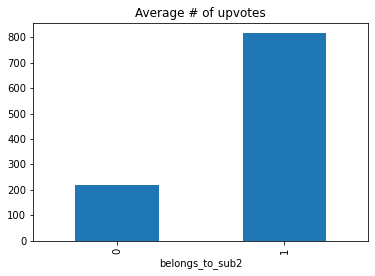

In [80]:
#plot upvotes
master_df.groupby('belongs_to_sub2')['upvotes'].mean().plot(kind = 'bar')
plt.title('Average # of upvotes')

## I decided to explore if word count is an effective criteria for predicting if the post will get more than 100 upvotes (new feature labelled 'highly upvoted')

In [76]:
master_df['highly_upvoted'] = master_df['upvotes'].map(lambda x: 1 if x >100 else 0)

In [77]:
master_df['highly_upvoted'].value_counts(normalize = True)

1    0.687321
0    0.312679
Name: highly_upvoted, dtype: float64

Text(0.5, 1.0, 'Highly upvoted posts and post length')

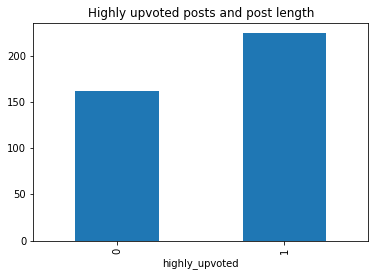

In [81]:
master_df.groupby('highly_upvoted')['word_count'].mean().plot(kind= 'bar')
plt.title('Highly upvoted posts and post length')

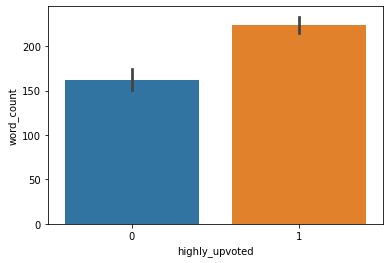

In [41]:
sns.barplot('highly_upvoted','word_count', data = master_df);

## There seems to be some truth to this, but it may be a non-linear relationship. This will be explored in the 'bonus' section, as a separate regression model.

In [42]:
master_df.to_csv('../datasets/post_EDA_30_nov_df.csv', index=False)